In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
from nltk.tokenize import RegexpTokenizer
import os

In [8]:
results = pd.read_csv("results/test_results.csv", sep=",")

In [9]:
results = results[results["lemmatized"] == False]
results

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
0,0,1,abstract,NaN,NaN,False,0.095000,0.119604,0.104838,53.840219
1,1,1,differential,NaN,NaN,False,0.095000,0.119604,0.104838,53.840219
4,4,2,abstract,False,3.0,False,0.095000,0.119604,0.104838,53.439022
5,5,2,differential,False,3.0,False,0.085616,0.090857,0.086802,53.439022
8,8,2,abstract,True,3.0,False,0.057880,0.120679,0.077036,54.546235
9,9,2,differential,True,3.0,False,0.055144,0.100929,0.070275,54.546235
12,12,2,abstract,True,5.0,False,0.053923,0.120679,0.073352,54.619760
13,13,2,differential,True,5.0,False,0.051330,0.100782,0.066984,54.619760
16,16,2,abstract,True,7.0,False,0.053128,0.120679,0.072539,52.220670
17,17,2,differential,True,7.0,False,0.048958,0.098167,0.064344,52.220670


In [14]:
_2_a_e = results[(results["method"] == 2) & (results["type"] == "abstract") & (results["expand"] == True)]
_2_a_e

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
8,8,2,abstract,True,3.0,False,0.057880,0.120679,0.077036,54.546235
12,12,2,abstract,True,5.0,False,0.053923,0.120679,0.073352,54.619760
16,16,2,abstract,True,7.0,False,0.053128,0.120679,0.072539,52.220670
20,20,2,abstract,True,10.0,False,0.052944,0.120679,0.072332,51.567512


In [15]:
_2_d_e = results[(results["method"] == 2) & (results["type"] == "differential") & (results["expand"] == True)]
_2_d_e

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
9,9,2,differential,True,3.0,False,0.055144,0.100929,0.070275,54.546235
13,13,2,differential,True,5.0,False,0.051330,0.100782,0.066984,54.619760
17,17,2,differential,True,7.0,False,0.048958,0.098167,0.064344,52.220670
21,21,2,differential,True,10.0,False,0.048810,0.098167,0.064172,51.567512


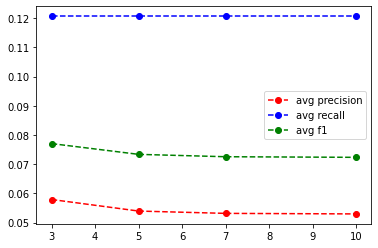

In [25]:
plt.plot(_2_a_e["max_addition"], _2_a_e["avg_precision"], linestyle="--", marker="o", color="red", label="avg precision")
plt.plot(_2_a_e["max_addition"], _2_a_e["avg_recall"], linestyle="--", marker="o", color="blue", label="avg recall")
plt.plot(_2_a_e["max_addition"], _2_a_e["avg_f1"], linestyle="--", marker="o", color="green", label="avg f1")
plt.legend()

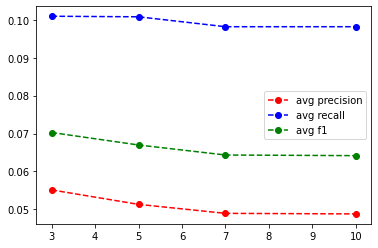

In [26]:
plt.plot(_2_d_e["max_addition"], _2_d_e["avg_precision"], linestyle="--", marker="o", color="red", label="avg precision")
plt.plot(_2_d_e["max_addition"], _2_d_e["avg_recall"], linestyle="--", marker="o", color="blue", label="avg recall")
plt.plot(_2_d_e["max_addition"], _2_d_e["avg_f1"], linestyle="--", marker="o", color="green", label="avg f1")
plt.legend()

In [28]:
_1_a = results[(results["method"] == 1) & (results["type"] == "abstract")]
_1_a

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
0,0,1,abstract,NaN,NaN,False,0.095,0.119604,0.104838,53.840219


In [29]:
_1_e = results[(results["method"] == 1) & (results["type"] == "differential")]
_1_e

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
1,1,1,differential,NaN,NaN,False,0.095,0.119604,0.104838,53.840219


In [35]:
document_keys = []

for file in glob.glob("fao/docs/*"):
    #print(file)
    filename = os.path.basename(file)
    #print(filename)
    
    doc_file = open(file, "r")
    keys_file = open(os.path.join("fao/keys", filename.split(".")[0] + ".key"), "r")
    
    doc = doc_file.read()
    doc = " ".join(RegexpTokenizer(r'[a-zA-Z]{2,}').tokenize(doc)).lower()
    
    
    keys = keys_file.read()
    keys = ",".join(keys.split("\n"))
    #print(keys)
    
    #print(doc[:10])
    #print(keys[:10])
    document_keys.append([doc, keys])

In [38]:
total_tags = 0
total_words = 0

for dk in document_keys:
    total_tags += len(dk[1].split(","))
    total_words += len(dk[0].split(" "))

print("Total words", total_words)
print("Total tags", total_tags)
print("Average words per document", total_words/len(document_keys))
print("Average tags per document", total_tags/len(document_keys))

Total words 731240
Total tags 997
Average words per document 24374.666666666668
Average tags per document 33.233333333333334
